In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import sklearn.discriminant_analysis as da
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score

In [86]:
# Randomly generating the data to get the random cov and mean
randomA = pd.DataFrame(
    np.random.randint(1,50, size=(10,10)), 
    columns=[
        'feature-1','feature-2','feature-3','feature-4','feature-5',
        'feature-6','feature-7','feature-8','feature-9','feature-10'])
randamB = pd.DataFrame(
    np.random.randint(1,50, size=(10,10)), 
    columns=[
        'feature-1','feature-2','feature-3','feature-4','feature-5',
        'feature-6','feature-7','feature-8','feature-9','feature-10'])
cov_randomA = randomA.cov()
cov_randamB = randamB.cov()
mean_randomA = randomA.mean()
mean_randamB = randamB.mean()

In [87]:
# Produce the dataA with the random(A) Mean and random(A) cov 
dataA = np.random.multivariate_normal(mean_randomA,cov_randomA,500)
# Produce the dataB with the random(B) Mean and random(B) cov 
dataB = np.random.multivariate_normal(mean_randamB,cov_randamB,500)
# Produce data with combining the dataA and dataB
data  = np.concatenate((dataA,dataB))
dataClass = np.concatenate((np.zeros(500), np.ones(500)))
data.shape
data

array([[ 10.499441  ,  30.51544299,  20.19313916, ...,  21.03235582,
         25.08076422,  14.2189575 ],
       [ 25.36802381,  12.11076291,  15.56338343, ...,  15.14623614,
         39.42070603,  36.46228554],
       [ 11.20348022,  64.68740693,   9.56189663, ...,  22.04657182,
         37.24066031,   7.11322098],
       ...,
       [ 19.61865309,   3.96214625,  28.74423889, ...,  30.12437215,
         21.11051548,  22.21825732],
       [ 22.80485703,  33.00042786,  22.08146761, ...,  20.72015931,
         35.02193299,  29.78981923],
       [ 15.82726766,  12.06956362, -17.90849185, ...,  19.5572719 ,
         16.55081185,  28.24876543]])

In [88]:
dataClass

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [89]:
# Data mean centering
datac = data - np.mean(data)
datac = pd.DataFrame(datac)
datac

0          1          2          3          4          5  \
0   -14.224849   5.791153  -4.531151 -13.551995  11.441399  -8.567735   
1     0.643734 -12.613527  -9.160907   7.053757  -7.514514  20.392874   
2   -13.520810  39.963117 -15.162394  -3.575496  -1.979016 -16.576231   
3    -9.068171   8.825126  -1.430063 -20.023533  -1.611317 -18.905037   
4   -11.645650  -7.451002  -5.259737  17.723745 -28.816078   3.696459   
5     6.526454  33.931496  -1.525348  19.351815  -2.604465   1.416390   
6    -0.610364  18.784860 -19.901686  21.881596  -7.843176   7.263885   
7    -4.472748  20.193803 -23.662337  -5.515856  11.424512  28.670812   
8   -34.125483  -5.173877 -27.662345  21.945856 -27.396766  23.391600   
9    10.730910  23.208356  -1.755562  16.274917  -1.013527 -11.529396   
10   -7.647585  12.820440 -20.244897  36.195885 -12.986399  -1.190457   
11  -10.298976  -3.602511 -12.425678  50.434522 -14.448717  14.163009   
12   -7.883336   0.554602  -2.453661  -3.519316   0.231656  -6.011108   
13   16.757536  -4.985734 -14.329319   7.879200   4.436589  26.428977   
14  -19.432274  11.163603   1.954551 -23.174560  19.765062 -18.952257   
15  -23.195652  -6.170656 -24.264155  -6.936237  11.840359   8.875423   
16   -3.152993  -8.965387 -18.575567  13.465903 -10.899453  14.854391   
17   -9.113012  -1.503308 -44.174934  -0.852122 -19.721084  29.510965   
18  -13.239133  16.006536 -27.976926  24.952587 -17.960554  11.930334   
19   16.017584  21.603266   3.487112  20.338166  17.514721  -2.016129   
20  -12.700913  -8.415325 -26.764302  35.279983 -26.418015  33.667385   
21  -13.243641  -4.951382 -13.789039   7.091906   3.911303   8.299857   
22    2.897754   1.978011  -0.314013  22.869978  12.287574  -2.622964   
23   -8.571271  -6.924787 -12.039497  14.077161 -19.148406  12.964430   
24   -5.654140 -10.426000 -15.577041  -9.736646  -1.863647   8.487833   
25  -30.076360  -6.413822 -29.155968  11.311358  -6.034782   9.977655   
26    9.743890  -6.206699  -1.229246 -10.147875  17.911664   3.883043   
27  -28.550203  10.680737 -16.535511  -4.392292   2.953104   1.886725   
28   -9.879374  12.529401   1.914920 -24.963447  -4.493933 -23.841411   
29   -4.280648  -9.061265  -3.586739  16.601644  10.380891 -13.950735   
..         ...        ...        ...        ...        ...        ...   
970  28.297714   9.278922  20.461378  -6.766148  13.508951 -34.349127   
971  -8.875539 -18.638350 -19.203861  26.652522 -22.728184 -10.667854   
972  10.233540 -11.515971 -16.030319 -11.376055  -3.270214  10.539204   
973  16.816403  -0.094626 -10.970916   4.947162   8.037004   8.813928   
974  -4.377875 -35.163670 -35.107984  -2.337837   5.629769   1.235038   
975  -9.268854 -14.468303  -2.420503  10.368051  13.564613 -15.957164   
976   8.141407  -7.392607 -21.090702  13.148461 -13.126633  -5.348926   
977 -26.475494 -32.180557   2.354708   0.993094  16.798382   0.201016   
978  -2.859273  -3.004383  11.018780   2.400521  -0.156024 -37.139320   
979  10.577750 -13.401826   1.422836   6.135677  12.225505   5.460460   
980 -13.267658  15.440027  53.812393 -11.741462 -19.101878 -13.291998   
981 -31.548810 -17.317082 -27.140305   8.021791  -3.937531  -1.990572   
982  -0.316034   0.944518  -4.937017  14.369160   7.925404  -0.260288   
983   0.466220   5.225202   6.468103   3.253811 -19.805723  -0.969323   
984  13.134515 -12.845256   3.126714   0.835981 -20.607775 -15.299303   
985 -21.680027  -8.122902  -8.236460   9.261960  18.281057   1.636728   
986   4.209061   5.622889 -13.635778   4.503448 -13.178840  -0.825379   
987  18.137165   7.229852 -24.609216 -13.647421 -20.780617 -21.306620   
988  51.599992  29.551381 -14.278158  18.195958 -14.698071  -2.683557   
989  -2.762132  -6.837123  -9.279395  -1.849874   1.899864  14.072295   
990  -1.074032   7.336327   3.487024  19.752779 -21.005984   3.513300   
991   4.523788 -11.791648   0.293118  14.617916   2.790464  14.851702   
992 -18.587095 -20.380710   1.577534   3.922245   8.397455 -20.492655  

In [90]:
eig_value, eig_vector = np.linalg.eig(np.dot(datac.T, datac))

In [91]:
eig_value.sort()
eig_value

array([ 26559.67354371,  50693.45006185, 113098.84968004, 142356.86515139,
       171866.78880124, 181998.42094886, 232422.64680647, 280830.91067967,
       327888.95046405, 545717.58421895])

In [92]:
eig_vector

array([[ 0.20180947,  0.66787061,  0.40389989, -0.19813524, -0.40729748,
        -0.05484259, -0.24183731, -0.22106903,  0.18573817, -0.00864142],
       [ 0.2398022 ,  0.24800231,  0.10617212,  0.29693645,  0.25605917,
        -0.70461   ,  0.20887161,  0.4121656 ,  0.05220629,  0.05719359],
       [ 0.60449574,  0.00169103,  0.15351803,  0.13150152, -0.02142125,
         0.44124796, -0.03130146,  0.30459052, -0.43556787,  0.33924686],
       [-0.28873472,  0.15572752,  0.05434859, -0.19662477, -0.04428429,
         0.106278  , -0.28298152,  0.6573404 , -0.24983159, -0.51275653],
       [ 0.30981   , -0.3135531 , -0.03753684,  0.49177044, -0.35401575,
        -0.19242279, -0.32125533, -0.19935607, -0.11460163, -0.4939838 ],
       [-0.48634914,  0.05593356,  0.44991792,  0.31046249, -0.16845495,
        -0.06454965,  0.28415019, -0.18354391, -0.55228378,  0.09763233],
       [ 0.06734591, -0.09299988,  0.30723952,  0.18687656, -0.18199825,
         0.3492916 ,  0.58014094,  0.20188291

In [93]:
master_eig_df = pd.DataFrame(eig_vector, columns=eig_value) # Eig values are sorted in the order of lowest variance to the highest
master_eig_df

26559.673544   50693.450062   113098.849680  142356.865151  171866.788801  \
0       0.201809       0.667871       0.403900      -0.198135      -0.407297   
1       0.239802       0.248002       0.106172       0.296936       0.256059   
2       0.604496       0.001691       0.153518       0.131502      -0.021421   
3      -0.288735       0.155728       0.054349      -0.196625      -0.044284   
4       0.309810      -0.313553      -0.037537       0.491770      -0.354016   
5      -0.486349       0.055934       0.449918       0.310462      -0.168455   
6       0.067346      -0.093000       0.307240       0.186877      -0.181998   
7      -0.318124      -0.131494       0.173453       0.417841      -0.099182   
8      -0.073885       0.079150      -0.535691      -0.018737      -0.714485   
9      -0.096279       0.578396      -0.428705       0.518196       0.242835   

   181998.420949  232422.646806  280830.910680  327888.950464  545717.584219  
0      -0.054843      -0.241837      -0.221069       0.185738      -0.008641  
1      -0.704610       0.208872       0.412166       0.052206       0.057194  
2       0.441248      -0.031301       0.304591      -0.435568       0.339247  
3       0.106278      -0.282982       0.657340      -0.249832      -0.512757  
4      -0.192423      -0.321255      -0.199356      -0.114602      -0.493984  
5      -0.064550       0.284150      -0.183544      -0.552284       0.097632  
6       0.349292       0.580141       0.201883       0.477675      -0.311248  
7       0.089129      -0.484649       0.266438       0.402282       0.437428  
8      -0.119610       0.247489       0.233789      -0.049817       0.240363  
9       0.330263       0.013569      -0.128615      -0.001958      -0.138208

In [94]:
# Function definition for Linear Discriminant Analysis
accuracy_set = [] # for plotting purposes
error_set = [] # for plotting purposes
def lda(train_dataset, test_dataset):
    lda = da.LinearDiscriminantAnalysis()
    lda.fit(train_dataset, test_dataset)
    prediction = lda.predict(train_dataset)
    error = sum(abs(prediction - test_dataset))
    accuracy = accuracy_score(prediction, test_dataset)
    accuracy_set.append(accuracy)
    error_set.append(error)
    return accuracy, error

<b> Builing the model with all the 10 features </b>

In [95]:
# Train and predict with all the 10 features to have a base case
accuracy, error = lda(data, dataClass)
print(accuracy, error)

0.823 177.0


<h1>Builing the model with 9 features</h1>

<h3>Modelling and Prediction</h3>

In [96]:
train_dataset_nine_features = np.dot(data, master_eig_df.drop(eig_value[:1], axis=1))
accuracy, error = lda(train_dataset_nine_features, dataClass)
print(accuracy, error)

0.809 191.0


In [97]:
accuracy_set

[0.823, 0.809]

<h3>Reconstruction</h3>

In [98]:
reconstructed_dataset = np.dot(train_dataset_nine_features, master_eig_df.drop(eig_value[:1], axis=1).T)
reconstructed_dataset.shape

(1000, 10)

<h3>Comparision - Original mean vs reconstructed mean</h3>

In [99]:
mean_randomA

feature-1     18.1
feature-2     29.4
feature-3     15.4
feature-4     29.8
feature-5     25.6
feature-6     25.8
feature-7     31.2
feature-8     25.0
feature-9     25.8
feature-10    23.3
dtype: float64

In [100]:
reconstructed_dataset.mean(axis=0)

array([19.17044865, 23.95190351, 21.44503794, 28.67070031, 24.31117563,
       22.94376599, 30.6665147 , 26.7508506 , 24.94066182, 24.75393657])

<h1>Builing the model with 8 features</h1>

<h3>Modelling and Prediction</h3>

In [101]:
train_dataset_eight_features = np.dot(data, master_eig_df.drop(eig_value[:2], axis=1))
accuracy, error = lda(train_dataset_eight_features, dataClass)
print(accuracy, error)

0.812 188.0


<h3>Reconstruction</h3>

In [102]:
reconstructed_dataset = np.dot(train_dataset_eight_features, master_eig_df.drop(eig_value[:2], axis=1).T)
reconstructed_dataset.shape

(1000, 10)

<h3>Comparision - Original mean vs reconstructed mean</h3>

In [103]:
mean_randomA

feature-1     18.1
feature-2     29.4
feature-3     15.4
feature-4     29.8
feature-5     25.6
feature-6     25.8
feature-7     31.2
feature-8     25.0
feature-9     25.8
feature-10    23.3
dtype: float64

In [104]:
reconstructed_dataset.mean(axis=0)

array([ 1.25339801, 17.29871366, 21.39967258, 24.49297824, 32.72290502,
       21.44322932, 33.16143451, 30.27845076, 22.81730428,  9.23724483])

<h1>Builing the model with 7 features</h1>

<h3>Modelling and Prediction</h3>

In [105]:
train_dataset_seven_features = np.dot(data, master_eig_df.drop(eig_value[:3], axis=1))
accuracy, error = lda(train_dataset_seven_features, dataClass)
print(accuracy, error)

0.812 188.0


<h3>Reconstruction</h3>

In [106]:
reconstructed_dataset = np.dot(train_dataset_seven_features, master_eig_df.drop(eig_value[:3], axis=1).T)
reconstructed_dataset.shape

(1000, 10)

<h3>Comparision - Original mean vs reconstructed mean</h3>

In [107]:
mean_randomA

feature-1     18.1
feature-2     29.4
feature-3     15.4
feature-4     29.8
feature-5     25.6
feature-6     25.8
feature-7     31.2
feature-8     25.0
feature-9     25.8
feature-10    23.3
dtype: float64

In [108]:
reconstructed_dataset.mean(axis=0)

array([-4.65807207, 15.74478074, 19.15278597, 23.6975335 , 33.27229334,
       14.85824046, 28.66468353, 27.73978981, 30.65767156, 15.51176554])

<h1>Builing the model with 6 features</h1>

<h3>Modelling and Prediction</h3>

In [109]:
train_dataset_six_features = np.dot(data, master_eig_df.drop(eig_value[:4], axis=1))
accuracy, error = lda(train_dataset_six_features, dataClass)
print(accuracy, error)

0.785 215.0


<h3>Reconstruction</h3>

In [110]:
reconstructed_dataset = np.dot(train_dataset_six_features, master_eig_df.drop(eig_value[:4], axis=1).T)
reconstructed_dataset.shape

(1000, 10)

<h3>Comparision - Original mean vs reconstructed mean</h3>

In [111]:
mean_randomA

feature-1     18.1
feature-2     29.4
feature-3     15.4
feature-4     29.8
feature-5     25.6
feature-6     25.8
feature-7     31.2
feature-8     25.0
feature-9     25.8
feature-10    23.3
dtype: float64

In [112]:
reconstructed_dataset.mean(axis=0)

array([ 5.0196    ,  1.24128514, 12.72975584, 33.30142876,  9.25237075,
       -0.30591801, 19.53692785,  7.33085273, 31.57284915, -9.79887476])

<h1>Builing the model with 5 features</h1>

<h3>Modelling and Prediction</h3>

In [113]:
train_dataset_five_features = np.dot(data, master_eig_df.drop(eig_value[:5], axis=1))
accuracy, error = lda(train_dataset_five_features, dataClass)
print(accuracy, error)

0.776 224.0


<h3>Reconstruction</h3>

In [114]:
reconstructed_dataset = np.dot(train_dataset_five_features, master_eig_df.drop(eig_value[:5], axis=1).T)
reconstructed_dataset.shape

(1000, 10)

<h3>Comparision - Original mean vs reconstructed mean</h3>

In [115]:
mean_randomA

feature-1     18.1
feature-2     29.4
feature-3     15.4
feature-4     29.8
feature-5     25.6
feature-6     25.8
feature-7     31.2
feature-8     25.0
feature-9     25.8
feature-10    23.3
dtype: float64

In [116]:
reconstructed_dataset.mean(axis=0)

array([-9.60996044, 10.4385753 , 11.96033444, 31.71079868, -3.46338388,
       -6.35658614, 12.99980307,  3.7683831 ,  5.90952836, -1.07659212])

<h2> Plotting the Error Rate for each feature reduction</h2>
<h3> Features from 10, 9, 8, 7, 6, 5 </h3>

In [117]:
accuracy_set

[0.823, 0.809, 0.812, 0.812, 0.785, 0.776]

In [118]:
error_set

[177.0, 191.0, 188.0, 188.0, 215.0, 224.0]

In [119]:
features=['10 Features', '9 Features', '8 Features', '7 Features', '6 Features', '5 Features']
pt.plot(features, error_set)
pt.show()

<h4> The plot results show us that with 10 features the error rate is lower. So, it is best to have 10 features for good prediction in this given data set with less error rate.</h4>

<h2>Question 3. Reducing the dimensionality of the original dataset using a backward search</h2>

In [120]:
accuracy_set = []
error_set = []
features = [0, 1, 2, 3, 4, 5, 6, 7, 9]
for each_feature in range(1, 10):
    train_dataset = pd.DataFrame(data).drop(features[each_feature*-1:], axis=1)
    accuracy, error = lda(train_dataset, dataClass)

<h3> The accuracy is</h3>

In [121]:
accuracy_set

[0.811, 0.807, 0.75, 0.745, 0.738, 0.731, 0.683, 0.529, 0.519]

<h3>The error set is </h3>

In [122]:
error_set

[189.0, 193.0, 250.0, 255.0, 262.0, 269.0, 317.0, 471.0, 481.0]

<h3>Plotting the classification error result</h3>

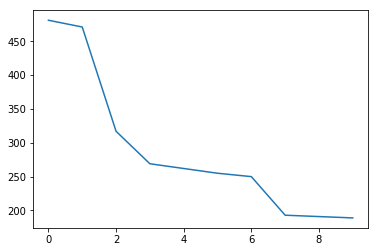

In [123]:
pt.plot(features[::-1], error_set)
pt.show()

<h4> The plot shows us that with all the features in the error rate is lower and with the lower number of dimensnality the errors are higher in our prediction.</h4>

<h2>Question 4. Qualitative comparision of the results of question 2b and question 3 its differences</h2>

<h4> Both the charts show us that the error rate is relatively low when we have all the 10 dimentional data (i.e. features) in this given data set. So, it is best to use all the 10 dimentions to have a good prediction model.</h4> 

<h5>End of Assignment - Thank you!</h5>